# use CNN for CIFAR10-dataset

labels:
- airplane : 0
- automobile : 1
- bird : 2
- cat : 3
- deer : 4
- dog : 5
- frog : 6
- horse : 7
- ship : 8
- truck : 9

**imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**load data**

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 94s 1us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

**watch data**

In [5]:
single_img = X_train[0]
single_img.shape

(32, 32, 3)

In [6]:
single_img

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

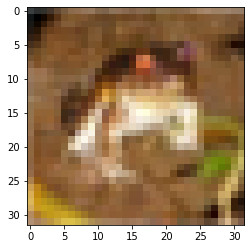

In [8]:
plt.imshow(single_img)

look the labels

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

we don't want numbers, they should be categorical -> so one-hot-encoding

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_example = to_categorical(y_train)
y_example.shape

(50000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

**transform y to categorical labels**

In [14]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

**normalize training data**

In [15]:
single_img.max()

255

In [ ]:
# use minmaxscaler from sklearn
# but here we can also use operations
# because all images are the same 0-255

In [16]:
X_train = X_train / 255
X_train.max()

1.0

In [17]:
X_test = X_test / 255

In [18]:
scaled_image = X_train[0]

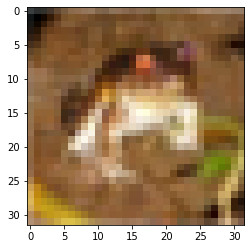

In [19]:
plt.imshow(scaled_image)

**create model**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
32/4

8.0

-> seems to fit

In [24]:
32*32*3

3072

In [25]:
model = Sequential()

# filters are power of 2 and the complex the problem and the image is the more filters are using
model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding='valid', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding='valid', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# MULTICLASS -> SoftMax
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

[see more metrics available](https://keras.io/metrics/)

In [ ]:
2 ** np.arange(1, 20)

array([     2,      4,      8,     16,     32,     64,    128,    256,
          512,   1024,   2048,   4096,   8192,  16384,  32768,  65536,
       131072, 262144, 524288], dtype=int32)

**train model**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1)
# early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=1, verbose=1)

In [28]:
model.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test), epochs=15, callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4856 - accuracy: 0.4630 - val_loss: 1.2596 - val_accuracy: 0.5489
Epoch 2/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1573 - accuracy: 0.5911 - val_loss: 1.1718 - val_accuracy: 0.5839
Epoch 3/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0228 - accuracy: 0.6403 - val_loss: 1.0400 - val_accuracy: 0.6372
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9152 - accuracy: 0.6798 - val_loss: 0.9752 - val_accuracy: 0.6645
Epoch 5/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8266 - accuracy: 0.7121 - val_loss: 0.9562 - val_accuracy: 0.6708
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7457 - accuracy: 0.7398 - val_loss: 0.9212 - val_accuracy: 0.6859
Epoch 7/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6790 - accuracy: 0.7622 - val_loss: 0.9321 -

**evaluate model**

<AxesSubplot:>

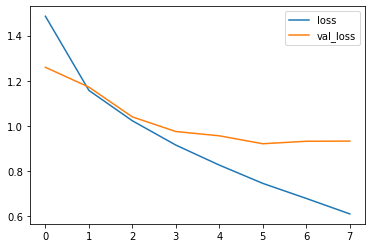

In [29]:
df_loss = pd.DataFrame(model.history.history)
df_loss.loc[:, ['loss', 'val_loss']].plot()

<AxesSubplot:>

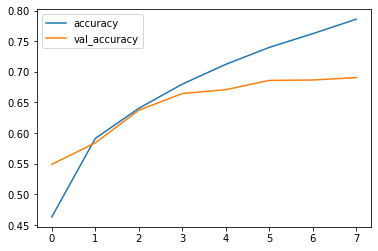

In [30]:
df_loss.loc[:, ['accuracy', 'val_accuracy']].plot()

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9328506588935852, 0.690500020980835]

In [33]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

In [34]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 4ms/step


array([[2.09629326e-03, 2.10846364e-01, 7.59003777e-03, ...,
        8.98887170e-04, 7.30284350e-03, 9.07333195e-03],
       [7.82303512e-03, 3.07544861e-02, 3.74518720e-07, ...,
        3.44355527e-07, 9.59977627e-01, 1.44403498e-03],
       [1.61274642e-01, 3.40091527e-01, 8.82570352e-03, ...,
        6.58613583e-03, 2.72420138e-01, 2.03428403e-01],
       ...,
       [8.46649164e-06, 3.34314791e-05, 6.20210962e-03, ...,
        5.22257686e-02, 1.20823215e-05, 1.63217294e-06],
       [4.03987095e-02, 7.97334313e-03, 2.52076192e-03, ...,
        1.00283660e-02, 2.45074580e-06, 5.76141283e-05],
       [1.29858817e-08, 2.23406964e-08, 1.16094775e-07, ...,
        9.99925375e-01, 5.03221319e-11, 5.78074610e-09]], dtype=float32)

In [35]:
predictions = predictions.argmax(axis=1)

In [37]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1066
           1       0.79      0.82      0.80       961
           2       0.59      0.55      0.57      1069
           3       0.55      0.51      0.53      1070
           4       0.64      0.64      0.64      1007
           5       0.49      0.67      0.57       730
           6       0.79      0.75      0.77      1041
           7       0.73      0.77      0.75       953
           8       0.76      0.83      0.79       926
           9       0.81      0.69      0.75      1177

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [36]:
confusion_matrix(predictions, y_test)

array([[754,  29,  74,  25,  20,  19,   8,  20,  71,  46],
       [ 15, 788,   8,  14,   3,   8,  10,   4,  35,  76],
       [ 59,  10, 589,  91,  96,  95,  53,  44,  19,  13],
       [ 17,   8,  68, 549,  77, 211,  61,  42,  19,  18],
       [ 26,   3,  75,  74, 641,  61,  36,  71,  15,   5],
       [  3,   7,  45, 106,  21, 489,  15,  39,   3,   2],
       [ 13,   9,  68,  61,  49,  39, 785,   8,   3,   6],
       [  8,   3,  34,  29,  66,  55,   8, 734,   5,  11],
       [ 58,  29,  20,  11,  14,   7,   8,   4, 764,  11],
       [ 47, 114,  19,  40,  13,  16,  16,  34,  66, 812]], dtype=int64)

<AxesSubplot:>

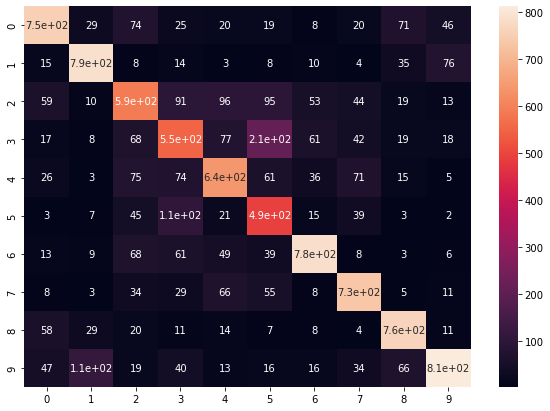

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(predictions, y_test), annot=True)

**predict single image**

In [50]:
my_data = X_test[0]
goal = y_test[0]

In [49]:
my_data

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [51]:
goal

array([3], dtype=uint8)

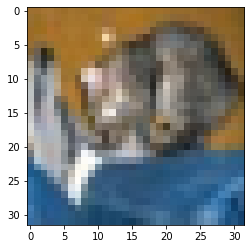

In [53]:
plt.imshow(my_data)

In [52]:
# batch_size width, height, color_channels
pred = model.predict(my_data.reshape(1, 32, 32, 3))
pred.argmax(axis=1)

1/1 [==============================] - 0s 13ms/step


array([3], dtype=int64)